## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily




---



Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.



---




Stage 6         Total 10%

#Import Libraries

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# **Stage 1**
***Describe Data***

A brief description of the data, where you sourced it, headers of the data. Summary statistics, charts etc...

If you using data from different sources how you might link them.

##Import & read the data

In [ ]:
drive.mount('/content/drive', force_remount=True)

file_path_results = '/content/drive/My Drive/Data/PremierLeague.csv'
file_path_players = '/content/drive/My Drive/Data/male_players.csv'

results_data = pd.read_csv(file_path_results)
player_data = pd.read_csv(file_path_players, dtype={'gk': 'object'})

Mounted at /content/drive


##Description of the EA Sports FC 24 Player Dataset


###Context
The dataset includes player data for Career Mode from FIFA 15 through EA Sports FC 24.
It allows comparisons of player attributes across the last ten versions of the video game, with data collected from 10th September 2015 to 22nd September 2023.

###Content:
**Number of Players:** Approximately 19,000 players.

**Attributes:** Each player has over 100 attributes.

**Key Attributes:**
Player performance metrics such as Attacking, Skills, Defense, Mentality, and Goalkeeping Skills.
Personal data including Nationality, Club, Date of Birth, Wage, and Salary.
Historical data across different game editions for longitudinal analysis.

###Source:
https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset?rvi=1

In [ ]:
# Display the first few rows of the dataset
player_data.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [ ]:
# Display basic information about the dataset
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


In [ ]:
# Get summary statistics for numerical columns
player_data.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000
50%,222734.000000,20.000000,2.0,66.000000,71.000000,7.500000e+05,4000.00000,25.000000,181.000000,75.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,40.000000
75%,239858.000000,22.000000,2.0,70.000000,75.000000,1.800000e+06,10000.00000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,46.000000
max,278145.000000,24.000000,2.0,94.000000,95.000000,1.940000e+08,575000.00000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


In [ ]:
# Show column names for further understanding of available attributes
player_data.columns.tolist()

['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'update_as_of',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_id',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_co

In [ ]:
# Data quality check
# Check for missing values
player_data.isnull().sum()

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64

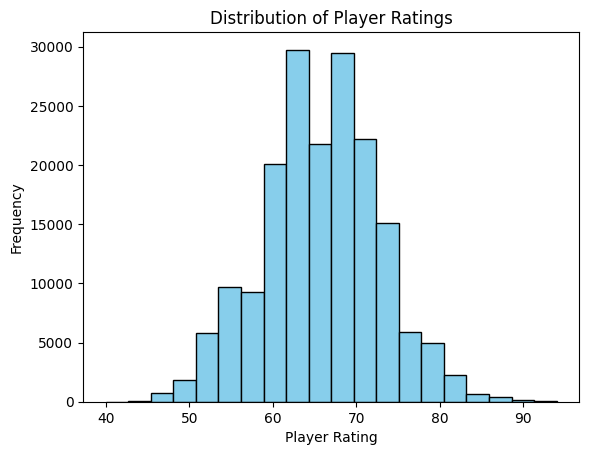

In [ ]:
# Histogram for player ratings
plt.hist(player_data['overall'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Player Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings')
plt.show()

In [ ]:
# Calculate average player rating for each team
team_avg_ratings = player_data.groupby('club_name')['overall'].mean().sort_values(ascending=False)

# Display the top 10 teams by average player rating
team_avg_ratings.head(10)

club_name
FC Bayern München      79.143939
Juventus               78.611888
FC Barcelona           78.423453
Real Madrid            78.165625
Paris Saint Germain    77.638514
Manchester United      76.691131
Napoli                 76.469751
Chelsea                76.455108
Manchester City        76.432177
Milan                  76.393728
Name: overall, dtype: float64

##Description of the Premier League Dataset

###Context:

The dataset tracks all matches in the English Premier League from the 1993-1994 season up to the present.
The Premier League represents the top level of English football and is updated weekly with the latest match results.

###Content:
***Time Span:*** Covers matches from season 1993-1994 onwards.

***Match Details:*** Each entry likely includes the date of the match, the teams involved, the scores, and possibly the location of the match.

***Additional Statistics:*** Where available, it might also include match statistics like possession percentages, number of shots on goal, and other game-specific details.

***Betting Odds:*** Basic betting odds from Bet365 might be included, such as odds for winning, drawing, and expected average goals per match.

###Source:
https://www.kaggle.com/datasets/ajaxianazarenka/premier-league?rvi=1

In [ ]:
# Display the first few rows of the dataset
results_data.head()

,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
0,1993-1994,8/14/1993,NaN,Arsenal,Coventry,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-1994,8/14/1993,NaN,Aston Villa,QPR,4,1,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-1994,8/14/1993,NaN,Chelsea,Blackburn,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-1994,8/14/1993,NaN,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-1994,8/14/1993,NaN,Man City,Leeds,1,1,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display basic information about the dataset
results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11736 entries, 0 to 11735
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  11736 non-null  object 
 1   Date                    11736 non-null  object 
 2   Time                    1856 non-null   object 
 3   HomeTeam                11736 non-null  object 
 4   AwayTeam                11736 non-null  object 
 5   FullTimeHomeTeamGoals   11736 non-null  int64  
 6   FullTimeAwayTeamGoals   11736 non-null  int64  
 7   FullTimeResult          11736 non-null  object 
 8   HalfTimeHomeTeamGoals   10976 non-null  float64
 9   HalfTimeAwayTeamGoals   10976 non-null  float64
 10  HalfTimeResult          10976 non-null  object 
 11  Referee                 9076 non-null   object 
 12  HomeTeamShots           9076 non-null   float64
 13  AwayTeamShots           9076 non-null   float64
 14  HomeTeamShotsOnTarget   9076 non-null 

In [ ]:
# Get summary statistics for numerical columns
results_data.describe()

,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamCorners,AwayTeamCorners,...,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
count,11736.000000,11736.000000,10976.000000,10976.000000,9076.000000,9076.000000,9076.000000,9076.000000,9076.000000,9076.000000,...,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000
mean,1.531953,1.155249,0.688684,0.507562,13.590569,10.739863,6.027876,4.714522,6.064456,4.766086,...,3.177419,4.525609,5.103637,2.990986,4.272629,4.622134,1.872198,2.235560,1.805102,2.142516
std,1.309531,1.145084,0.838984,0.726797,5.327434,4.653490,3.285731,2.765616,3.106650,2.741104,...,2.561234,1.597270,5.304947,2.232037,1.370670,4.254734,0.285245,0.452571,0.264983,0.416726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.090000,3.100000,1.170000,1.070000,2.970000,1.150000,1.220000,1.510000,1.200000,1.470000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,...,1.710000,3.620000,2.250000,1.670000,3.470000,2.180000,1.670000,1.910000,1.610000,1.840000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,...,2.395000,3.960000,3.345000,2.310000,3.790000,3.205000,1.850000,2.135000,1.780000,2.050000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,8.000000,6.000000,...,3.520000,4.750000,5.600000,3.370000,4.520000,5.295000,2.060000,2.440000,1.990000,2.332500
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,20.000000,19.000000,...,22.000000,17.000000,50.000000,18.090000,12.850000,37.570000,2.880000,5.060000,2.690000,4.540000


In [ ]:
# Show column names for further understanding of available attributes
results_data.columns.tolist()

['Season',
 'Date',
 'Time',
 'HomeTeam',
 'AwayTeam',
 'FullTimeHomeTeamGoals',
 'FullTimeAwayTeamGoals',
 'FullTimeResult',
 'HalfTimeHomeTeamGoals',
 'HalfTimeAwayTeamGoals',
 'HalfTimeResult',
 'Referee',
 'HomeTeamShots',
 'AwayTeamShots',
 'HomeTeamShotsOnTarget',
 'AwayTeamShotsOnTarget',
 'HomeTeamCorners',
 'AwayTeamCorners',
 'HomeTeamFouls',
 'AwayTeamFouls',
 'HomeTeamYellowCards',
 'AwayTeamYellowCards',
 'HomeTeamRedCards',
 'AwayTeamReadCards',
 'B365HomeTeam',
 'B365Draw',
 'B365AwayTeam',
 'B365Over2.5Goals',
 'B365Under2.5Goals',
 'MarketMaxHomeTeam',
 'MarketMaxDraw',
 'MarketMaxAwayTeam',
 'MarketAvgHomeTeam',
 'MarketAvgDraw',
 'MarketAvgAwayTeam',
 'MarketMaxOver2.5Goals',
 'MarketMaxUnder2.5Goals',
 'MarketAvgOver2.5Goals',
 'MarketAvgUnder2.5Goals']

In [ ]:
# Data quality check
# Check for missing values
results_data.isnull().sum()

Season                       0
Date                         0
Time                      9880
HomeTeam                     0
AwayTeam                     0
FullTimeHomeTeamGoals        0
FullTimeAwayTeamGoals        0
FullTimeResult               0
HalfTimeHomeTeamGoals      760
HalfTimeAwayTeamGoals      760
HalfTimeResult             760
Referee                   2660
HomeTeamShots             2660
AwayTeamShots             2660
HomeTeamShotsOnTarget     2660
AwayTeamShotsOnTarget     2660
HomeTeamCorners           2660
AwayTeamCorners           2660
HomeTeamFouls             2660
AwayTeamFouls             2660
HomeTeamYellowCards       2660
AwayTeamYellowCards       2660
HomeTeamRedCards          2660
AwayTeamReadCards         2660
B365HomeTeam              3420
B365Draw                  3420
B365AwayTeam              3420
B365Over2.5Goals          8877
B365Under2.5Goals         8877
MarketMaxHomeTeam         9880
MarketMaxDraw             9880
MarketMaxAwayTeam         9880
MarketAv

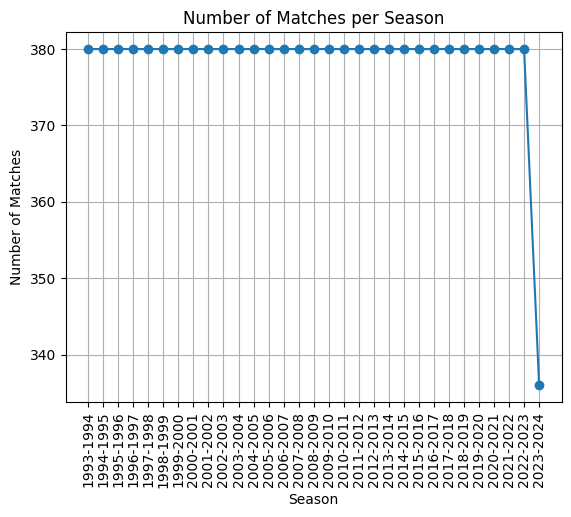

In [ ]:
# Number of Matches per Season to check if we have a full data set
matches_per_season = results_data['Season'].value_counts().sort_index()
plt.plot(matches_per_season.index, matches_per_season.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Season')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

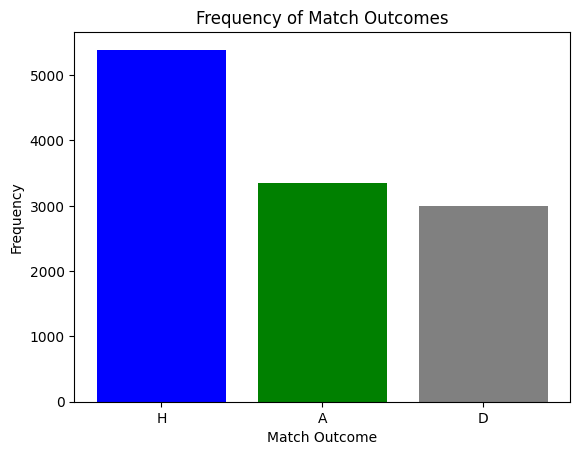

In [ ]:
# Frequency of Draw vs. Win Outcomes
outcome_counts = results_data['FullTimeResult'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'green', 'gray'])
plt.xlabel('Match Outcome')
plt.ylabel('Frequency')
plt.title('Frequency of Match Outcomes')
plt.show()

# **Stage 2**

Justification for the property that you would like the model to predict.

###Aim:
The aim of my model is to utilise FIFA Player data to predict Premier League football match outcomes.

----------------

###Justification
As a massive Premier League & Fifa fan, I'm particularly interested in developing a model that can predict match outcomes by combining player stats from Fifa & histroic results.

Predicting Premier League outcomes adds an extra layer of excitement to watching games.

# **Stage 3**

Cleaning the data, linking datasets etc..



The Fifa datasets only includes data from Version 15 (Season 14/15), we will first get rid of any games that happened prior to this season.

In [ ]:
dated_results_data = results_data[results_data['Season'] >= '2014-2015']

Now we need to add a 'Season' column to the player_data DataFrame by converting the fifa_version column into a season format. This common column allows me to merge the player_data DataFrame the results_data Dataframe. We can now drop the fifa_version column as it is not needed anymore

In [ ]:
player_data['Season'] = player_data['fifa_version'].apply(lambda x: f"{int(2000 + x - 1)}-{int(2000 + x)}")
player_data.drop(columns=['fifa_version'], inplace=True)

After looking at the dataset I have found that a team like Luton is classed as Premier League for all the fifa versions. Luton only got promoted last year so this is incorrect. Firstly, I will find the teams who competed in each Premier League season we are concerned with.

In [ ]:
unique_teams_by_season = dated_results_data.groupby('Season')['HomeTeam'].unique()

# Print out the teams for each season
for season, teams in unique_teams_by_season.items():
    print(f"Season {season}:")
    for team in sorted(teams):
        print(team)
    print()

Season 2014-2015:
Arsenal
Aston Villa
Burnley
Chelsea
Crystal Palace
Everton
Hull
Leicester
Liverpool
Man City
Man United
Newcastle
QPR
Southampton
Stoke
Sunderland
Swansea
Tottenham
West Brom
West Ham

Season 2015-2016:
Arsenal
Aston Villa
Bournemouth
Chelsea
Crystal Palace
Everton
Leicester
Liverpool
Man City
Man United
Newcastle
Norwich
Southampton
Stoke
Sunderland
Swansea
Tottenham
Watford
West Brom
West Ham

Season 2016-2017:
Arsenal
Bournemouth
Burnley
Chelsea
Crystal Palace
Everton
Hull
Leicester
Liverpool
Man City
Man United
Middlesbrough
Southampton
Stoke
Sunderland
Swansea
Tottenham
Watford
West Brom
West Ham

Season 2017-2018:
Arsenal
Bournemouth
Brighton
Burnley
Chelsea
Crystal Palace
Everton
Huddersfield
Leicester
Liverpool
Man City
Man United
Newcastle
Southampton
Stoke
Swansea
Tottenham
Watford
West Brom
West Ham

Season 2018-2019:
Arsenal
Bournemouth
Brighton
Burnley
Cardiff
Chelsea
Crystal Palace
Everton
Fulham
Huddersfield
Leicester
Liverpool
Man City
Man United
Newca

After realising that the league_id updated by the season there was an easier way around this. Premier League has league id of 13 and like I said earlier Luton were in the championship in Fifa 23 & their league_id shows that of the Championship (14). So now we will just make sure we have all the teams correct. We will find all teams who played in the Premier League from 2014 onwards.

In [ ]:
all_unique_teams = set()

# Aggregate unique teams from each season
for teams_array in unique_teams_by_season.values:
    teams_list = teams_array.tolist()  # Convert numpy array to list
    all_unique_teams.update(teams_list)

# Print out the full list of unique teams
print(len(all_unique_teams), "Unique Teams:")
for team in sorted(all_unique_teams):
    print(team)

34 Unique Teams:
Arsenal
Aston Villa
Bournemouth
Brentford
Brighton
Burnley
Cardiff
Chelsea
Crystal Palace
Everton
Fulham
Huddersfield
Hull
Leeds
Leicester
Liverpool
Luton
Man City
Man United
Middlesbrough
Newcastle
Norwich
Nott'm Forest
QPR
Sheffield United
Southampton
Stoke
Sunderland
Swansea
Tottenham
Watford
West Brom
West Ham
Wolves


Now we will filter out the players who have played in the Premier League.

In [ ]:
pl_player_data = player_data[player_data['league_id'] == 13]

We will double check to make sure our number of clubs is correct.

In [ ]:
unique_clubs = pl_player_data['club_name'].unique()
sorted_unique_clubs = np.sort(unique_clubs)
print(len(sorted_unique_clubs), "Unique Clubs:")
for club in sorted_unique_clubs:
    print(club)

34 Unique Clubs:
AFC Bournemouth
Arsenal
Aston Villa
Brentford
Brighton & Hove Albion
Burnley
Cardiff City
Chelsea
Crystal Palace
Everton
Fulham
Huddersfield Town
Hull City
Leeds United
Leicester City
Liverpool
Luton Town
Manchester City
Manchester United
Middlesbrough
Newcastle United
Norwich City
Nottingham Forest
Queens Park Rangers
Sheffield United
Southampton
Stoke City
Sunderland
Swansea City
Tottenham Hotspur
Watford
West Bromwich Albion
West Ham United
Wolverhampton Wanderers


I noticed that not all teams names have a standard format. Example would be Wolverhampton Wanderers in one dataset and Wolves in the other. So I must now normalise the team names in order to merge them later.

In [ ]:
name_normalisation = {
    "AFC Bournemouth": "Bournemouth",
    "Brighton & Hove Albion": "Brighton",
    "Cardiff City": "Cardiff",
    "Huddersfield Town": "Huddersfield",
    "Hull City": "Hull",
    "Leeds United": "Leeds",
    "Leicester City": "Leicester",
    "Luton Town": "Luton",
    "Manchester City": "Man City",
    "Manchester United": "Man United",
    "Newcastle United": "Newcastle",
    "Norwich City": "Norwich",
    "Nottingham Forest": "Nott'm Forest",
    "Queens Park Rangers": "QPR",
    "Stoke City": "Stoke",
    "Swansea City": "Swansea",
    "Tottenham Hotspur": "Tottenham",
    "West Bromwich Albion": "West Brom",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"
}

pl_player_data.loc[:, 'club_name'] = pl_player_data['club_name'].apply(lambda x: name_normalisation.get(x, x))

In [ ]:
unique_results_clubs = sorted(dated_results_data['HomeTeam'].unique())
unique_player_clubs = sorted(pl_player_data['club_name'].unique())

# Double check now they are matching
if set(unique_results_clubs) == set(unique_player_clubs):
    print("The unique clubs in results_data and player_data are the same.")
else:
    print("The unique clubs in results_data and player_data are different.")

The unique clubs in results_data and player_data are the same.


Next for the Fifa dataset we have to decide what columns we want to keep.

I kept the fifa version so I can cross reference between dates of games & if they were at the club at that time. I picked out certain columns from the dataset to make a really detailed profile of Premier League players. I wanted to cover everything from their basic stats to more complex in-depth that affects how well they play. I also included their overall ratings and potential as these are probably the main factors in how good a player is. I retained details about how much they're worth and how much they get paid. The better the player the higher their value.

In [ ]:
columns_to_keep_fifa = [
    'Season', 'club_name', 'short_name', 'overall', 'potential',
    'value_eur', 'wage_eur', 'age', 'club_position', 'weak_foot',
    'skill_moves', 'international_reputation', 'work_rate', 'pace', 'shooting',
    'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
    'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
    'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_reactions',
    'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
    'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes'
]

player_data_updated_columns = pl_player_data[columns_to_keep_fifa]

Back to the Premier League results database. I only decided to keep a few columns. We need to know the teams that were playing and the results. I also kept the season so I can combine the datasets later.

I decided to remove all the other stats like betting odds and match stats as they could weigh very heavily towards the prediction of the match and make it 'too easy' of the AI.

I was in two minds about keeping the odds in as this could heavily weigh on the prediction model however I did decide to keep them in as this could give an indication of team form, key players injured etc & future games would have odds pre-game which a prediction model could use.

In [ ]:
columns_to_keep_results = [
    'Season', 'HomeTeam', 'AwayTeam', 'FullTimeResult', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam'
]

results_data_updated_columns = dated_results_data[columns_to_keep_results]

Next is to convert the players club position to a numerical value. For this I have decided it will be 1 if the player is a starter, 2 if they are a sub and 3 if they are a reserve player.

In [ ]:
player_data_updated_columns.loc[:, 'club_position'] = player_data_updated_columns['club_position'].map({'RES': 3, 'SUB': 2}).fillna(1)

Check the first few entries

In [ ]:
player_data_updated_columns.head()

,Season,club_name,short_name,overall,potential,value_eur,wage_eur,age,club_position,weak_foot,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1,2023-2024,Man City,E. Haaland,91,94,185000000.0,340000.0,22,1.0,3,...,84,87.0,38,47,29,7,14,13,11,7
2,2023-2024,Man City,K. De Bruyne,91,91,103000000.0,350000.0,32,2.0,5,...,83,88.0,66,70,53,15,13,5,10,13
9,2023-2024,Liverpool,Alisson,89,90,77500000.0,180000.0,30,1.0,3,...,23,66.0,15,19,16,86,85,85,90,89
10,2023-2024,Man City,Rodri,89,90,105500000.0,250000.0,27,1.0,4,...,62,85.0,88,87,78,10,10,7,14,8
11,2023-2024,Man City,Rúben Dias,89,90,106500000.0,250000.0,26,1.0,4,...,45,81.0,91,91,87,7,8,13,7,12


In [ ]:
work_rate_mapping = {
    'High/High': 9,
    'High/Medium': 8,
    'High/Low': 7,
    'Medium/High': 6,
    'Medium/Medium': 5,
    'Medium/Low': 4,
    'Low/High': 3,
    'Low/Medium': 2,
    'Low/Low': 1
}

# Map the combinations to numerical values
player_data_updated_columns.loc[:, 'work_rate'] = player_data_updated_columns['work_rate'].map(work_rate_mapping)

In [ ]:
# Check work rates have been mapped
player_data_updated_columns['work_rate'].head()

1     8
2     8
9     5
10    6
11    6
Name: work_rate, dtype: object

Checking for null values of remaining data.

In [ ]:
null_columns = player_data_updated_columns.columns[player_data_updated_columns.isnull().any()]

# Print columns with null values
print("Columns with Null Values:")
for column in null_columns:
    print(column)

Columns with Null Values:
value_eur
pace
shooting
passing
dribbling
defending
physic
mentality_composure


Adding 0 to value_eur. Players were all 36 or older, probably in last year of contracts/retiring and therefore probably held no value.

Dropping the mentality_composure as too many null values and alot were outfielders which should have high values.

pace, shooting, passing, dribbling, defending, physic are all outfield specific base stats. Goalkeepers have their own seperate base stats which include diving reflexes etc. I have decided to fill all these with a generic value of 15. Similar to the outfielders goalkeeper ratings.

In [ ]:
# Fill null values in 'value_eur' column with 0
player_data_updated_columns.loc[:, 'value_eur'].fillna(0, inplace=True)

# Remove 'mentality_composure' column
player_data_updated_columns.drop(columns=['mentality_composure'], inplace=True)

# Define neutral value
neutral_value = 15

# Fill null values in the specified columns with the neutral value
columns_to_fill = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
player_data_updated_columns.loc[:, columns_to_fill] = player_data_updated_columns[columns_to_fill].fillna(neutral_value)

<ipython-input-237-c80b749008d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data_updated_columns.loc[:, 'value_eur'].fillna(0, inplace=True)
<ipython-input-237-c80b749008d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data_updated_columns.drop(columns=['mentality_composure'], inplace=True)


Double check null values

In [ ]:
player_data_updated_columns.isnull().sum()

Season                         0
club_name                      0
short_name                     0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
club_position                  0
weak_foot                      0
skill_moves                    0
international_reputation       0
work_rate                      0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_s

Now for the Premier League Results dataset we only have 4 columns. We must change the full time result to numeric values and classify them 0-2. Previously had them at 1-3 but changed it to 0-2 as to_categorical begins its index at 0.

In [ ]:
results_data_updated_columns.loc[:, 'FullTimeResult'] = results_data_updated_columns['FullTimeResult'].map({'A': 2, 'D': 1}).fillna(0)

In [ ]:
results_data_updated_columns['FullTimeResult'] = results_data_updated_columns['FullTimeResult'].astype(int)

<ipython-input-240-1b439f524d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_data_updated_columns['FullTimeResult'] = results_data_updated_columns['FullTimeResult'].astype(int)


In [ ]:
results_data_updated_columns.head()

,Season,HomeTeam,AwayTeam,FullTimeResult,B365HomeTeam,B365Draw,B365AwayTeam
7980,2014-2015,Arsenal,Crystal Palace,0,1.25,6.5,15.0
7981,2014-2015,Leicester,Everton,1,3.20,3.4,2.4
7982,2014-2015,Man United,Swansea,2,1.36,5.0,11.0
7983,2014-2015,QPR,Hull,2,2.50,3.3,3.1
7984,2014-2015,Stoke,Aston Villa,2,1.95,3.5,4.5


In order to merge it with the other dataset I have decided to give each club a rating based on the averages in the club for that season. In order to do that I have to drop player names as they are not numeric and I cannot get a mean value for this.

In [ ]:
# Remove 'short_name' column
player_data_updated_columns.drop(columns=['short_name'], inplace=True)

<ipython-input-242-1adfc7717d2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data_updated_columns.drop(columns=['short_name'], inplace=True)


In [ ]:
# Add weighted factors for club position
weight_factors = {1: 1.0, 2: 0.7, 3: 0.4}

# Apply weight factor based on club_position to columns
numeric_columns = player_data_updated_columns.columns.drop(['Season', 'club_name', 'club_position'])
player_data_updated_columns[numeric_columns] = player_data_updated_columns[numeric_columns].mul(player_data_updated_columns['club_position'].map(weight_factors), axis=0)

# Group by Season and club_name, and calculate the weighted mean for all numeric columns
weighted_mean_data = player_data_updated_columns.groupby(['Season', 'club_name'])[numeric_columns].mean()

print(weighted_mean_data)

<ipython-input-243-3009c4c0d53c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data_updated_columns[numeric_columns] = player_data_updated_columns[numeric_columns].mul(player_data_updated_columns['club_position'].map(weight_factors), axis=0)


                              overall  potential     value_eur      wage_eur  \
Season    club_name                                                            
2014-2015 Arsenal           54.263636  57.133333  6.472424e+06  61612.121212   
          Aston Villa       50.533333  53.424242  1.920894e+06  21560.606061   
          Burnley           47.712121  50.330303  7.266818e+05   8369.696970   
          Chelsea           54.345455  57.842424  7.797788e+06  68045.454545   
          Crystal Palace    50.115152  52.166667  1.326773e+06  16481.818182   
...                               ...        ...           ...           ...   
2023-2024 Nott'm Forest     53.178788  55.893939  6.375152e+06  33018.181818   
          Sheffield United  49.972727  53.496970  2.457152e+06  13875.757576   
          Tottenham         56.509677  59.916129  1.702653e+07  51416.129032   
          West Ham          52.772727  55.745455  8.568409e+06  35718.181818   
          Wolves            57.618519  6

In [ ]:
# Reset index so Season & Club name are accessible again
player_data = weighted_mean_data.groupby(['Season', 'club_name']).mean().reset_index()

To merge the two updated datasets, I used two left joins sequentially:

Merges results_data_updated_columns with player_data based on the columns 'Season' and 'HomeTeam', adding player data for the HomeTeam.

Merges the result of the first merge with player_data based on the columns 'Season' and 'AwayTeam', adding player data for the AwayTeam.

After each merge, it drops the duplicate club name columns created by the merge.

In [ ]:
# Merge the player data for the HomeTeam
results_with_home = pd.merge(results_data_updated_columns, player_data, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'club_name'])

# Merge the player data for the AwayTeam
results_with_home_away = pd.merge(results_with_home, player_data, how='left', left_on=['Season', 'AwayTeam'], right_on=['Season', 'club_name'], suffixes=('_home', '_away'))

# Drop the extra club_name columns
results_with_home_away.drop(['club_name_home', 'club_name_away'], axis=1, inplace=True)

# Display the first few rows of the merged dataset to verify
results_with_home_away.head()

,Season,HomeTeam,AwayTeam,FullTimeResult,B365HomeTeam,B365Draw,B365AwayTeam,overall_home,potential_home,value_eur_home,...,mentality_vision_away,mentality_penalties_away,defending_marking_awareness_away,defending_standing_tackle_away,defending_sliding_tackle_away,goalkeeping_diving_away,goalkeeping_handling_away,goalkeeping_kicking_away,goalkeeping_positioning_away,goalkeeping_reflexes_away
0,2014-2015,Arsenal,Crystal Palace,0,1.25,6.5,15.0,54.263636,57.133333,6.472424e+06,...,38.969697,38.187879,34.593939,35.809091,34.263636,11.042424,12.093939,11.848485,11.327273,11.796970
1,2014-2015,Leicester,Everton,1,3.20,3.4,2.4,48.009091,50.715152,7.516061e+05,...,42.518182,41.396970,38.375758,40.481818,38.666667,11.312121,12.460606,12.021212,11.854545,11.857576
2,2014-2015,Man United,Swansea,2,1.36,5.0,11.0,53.775758,57.166667,8.328273e+06,...,40.663636,38.763636,34.551515,38.000000,36.793939,12.506061,11.696970,11.303030,11.554545,12.633333
3,2014-2015,QPR,Hull,2,2.50,3.3,3.1,50.966667,53.330303,1.956576e+06,...,41.393939,39.993939,34.893939,37.739394,35.409091,11.048485,10.269697,10.190909,10.751515,10.378788
4,2014-2015,Stoke,Aston Villa,2,1.95,3.5,4.5,51.072727,53.109091,2.400924e+06,...,39.130303,41.127273,34.639394,36.945455,36.009091,11.387879,10.227273,11.587879,11.178788,10.233333


# **Stage 4**
Choose and train Estimator.

In [ ]:
#Change the name of the dataset
combined_data = results_with_home_away.copy()

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Columns: 103 entries, Season to goalkeeping_reflexes_away
dtypes: float64(97), int64(1), object(5)
memory usage: 3.0+ MB


In [ ]:
combined_data.head()

,Season,HomeTeam,AwayTeam,FullTimeResult,B365HomeTeam,B365Draw,B365AwayTeam,overall_home,potential_home,value_eur_home,...,mentality_vision_away,mentality_penalties_away,defending_marking_awareness_away,defending_standing_tackle_away,defending_sliding_tackle_away,goalkeeping_diving_away,goalkeeping_handling_away,goalkeeping_kicking_away,goalkeeping_positioning_away,goalkeeping_reflexes_away
0,2014-2015,Arsenal,Crystal Palace,0,1.25,6.5,15.0,54.263636,57.133333,6.472424e+06,...,38.969697,38.187879,34.593939,35.809091,34.263636,11.042424,12.093939,11.848485,11.327273,11.796970
1,2014-2015,Leicester,Everton,1,3.20,3.4,2.4,48.009091,50.715152,7.516061e+05,...,42.518182,41.396970,38.375758,40.481818,38.666667,11.312121,12.460606,12.021212,11.854545,11.857576
2,2014-2015,Man United,Swansea,2,1.36,5.0,11.0,53.775758,57.166667,8.328273e+06,...,40.663636,38.763636,34.551515,38.000000,36.793939,12.506061,11.696970,11.303030,11.554545,12.633333
3,2014-2015,QPR,Hull,2,2.50,3.3,3.1,50.966667,53.330303,1.956576e+06,...,41.393939,39.993939,34.893939,37.739394,35.409091,11.048485,10.269697,10.190909,10.751515,10.378788
4,2014-2015,Stoke,Aston Villa,2,1.95,3.5,4.5,51.072727,53.109091,2.400924e+06,...,39.130303,41.127273,34.639394,36.945455,36.009091,11.387879,10.227273,11.587879,11.178788,10.233333


In [ ]:
# Shape of the dataset
combined_data.shape

(3756, 103)

In [ ]:
# Using all the avg values from the fifa dataset
feature_columns = combined_data.columns[4:]

# Checking the correct columns are used
feature_columns

Index(['B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'overall_home',
       'potential_home', 'value_eur_home', 'wage_eur_home', 'age_home',
       'weak_foot_home', 'skill_moves_home', 'international_reputation_home',
       'work_rate_home', 'pace_home', 'shooting_home', 'passing_home',
       'dribbling_home', 'defending_home', 'physic_home',
       'attacking_crossing_home', 'attacking_finishing_home',
       'attacking_heading_accuracy_home', 'attacking_short_passing_home',
       'attacking_volleys_home', 'skill_dribbling_home', 'skill_curve_home',
       'skill_fk_accuracy_home', 'skill_long_passing_home',
       'skill_ball_control_home', 'movement_acceleration_home',
       'movement_sprint_speed_home', 'movement_agility_home',
       'movement_reactions_home', 'movement_balance_home',
       'power_shot_power_home', 'power_jumping_home', 'power_stamina_home',
       'power_strength_home', 'power_long_shots_home',
       'mentality_aggression_home', 'mentality_interceptions_home

In [ ]:
# Shape of the feature columns
combined_data[feature_columns].shape

(3756, 99)

In [ ]:
# FullTimeResult column to be predicted
target_column = 'FullTimeResult'

In [ ]:
combined_data[target_column]

0       0
1       1
2       2
3       2
4       2
       ..
3751    2
3752    0
3753    0
3754    0
3755    2
Name: FullTimeResult, Length: 3756, dtype: int64

In [ ]:
combined_data[target_column].shape

(3756,)

In [ ]:
# Adding the columns to X & y variables
X = combined_data[feature_columns]
y = combined_data[target_column]

In [ ]:
# Changed columns to numeric to avoid Error: 'Failed to convert a NumPy array to a Tensor (Unsupported object type float).'
X = X.apply(pd.to_numeric, errors='coerce')

# Convert the target labels y into vectors for multi-class classification.
Y_c = to_categorical(y)
Y_c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

##Iteration 1 (Sequential)

This neural network model comprises an input layer capable of accommodating variable-length sequences or batches with 99 features each. It's followed by two hidden layers employing Rectified Linear Unit (ReLU) activation functions, progressively reducing the dimensionality of the input data to extract relevant features. The output layer, employing the softmax activation function, yields probabilities for three distinct classes, making it suitable for multi-class classification tasks. The model is trained using the categorical cross-entropy loss function and optimized with the Adam optimizer, with performance assessed using accuracy metrics.

In [ ]:
model1 = Sequential()

model1.add(Dense(16, activation='relu', input_shape=(None, 99)))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, None, 16)          1600      
                                                                 
 dense_25 (Dense)            (None, None, 8)           136       
                                                                 
 dense_26 (Dense)            (None, None, 3)           27        
                                                                 
Total params: 1763 (6.89 KB)
Trainable params: 1763 (6.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y_c,test_size=0.20)

In [ ]:
# Fitting a model to the data. This involves training the model on a portion of the data to learn patterns.
history = model1.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=150)

Epoch 1/150
94/94 [==============================] - 1s 5ms/step - loss: 124411.9297 - accuracy: 0.4258 - val_loss: 45950.1367 - val_accuracy: 0.4894
Epoch 2/150
94/94 [==============================] - 0s 3ms/step - loss: 24377.3984 - accuracy: 0.4381 - val_loss: 12414.6572 - val_accuracy: 0.4707
Epoch 3/150
94/94 [==============================] - 0s 3ms/step - loss: 10104.6621 - accuracy: 0.4294 - val_loss: 8769.6572 - val_accuracy: 0.4455
Epoch 4/150
94/94 [==============================] - 0s 3ms/step - loss: 7917.5020 - accuracy: 0.4281 - val_loss: 5693.9048 - val_accuracy: 0.4202
Epoch 5/150
94/94 [==============================] - 0s 3ms/step - loss: 6123.8882 - accuracy: 0.4407 - val_loss: 4320.7002 - val_accuracy: 0.4335
Epoch 6/150
94/94 [==============================] - 0s 3ms/step - loss: 5493.0630 - accuracy: 0.4184 - val_loss: 6776.0078 - val_accuracy: 0.5173
Epoch 7/150
94/94 [==============================] - 0s 3ms/step - loss: 4893.3594 - accuracy: 0.4411 - val_loss

## Iteration 2 (Linear SVC)

After Iteration 1s results, we had to look at other options for our estimator. Looking at the Scikit learn choosing the right estimator graph, the next logical step for our dataset looks like Linear SVC.

In [ ]:
# Generate a synthetic classification dataset with our 3756 samples, 99 features per sample, 3 classes, and one cluster per class.
X, y = make_classification(n_samples=3756, n_features=99, n_classes=3, n_clusters_per_class=1, random_state=0)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Create a pipeline with StandardScaler and LinearSVC
clf = make_pipeline(StandardScaler(),
                    LinearSVC(dual=False, random_state=0, tol=1e-5))

# Train the model
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual=False, random_state=0, tol=1e-05))])

##Iteration 3 (KNeighbor)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create KNeighbors classifier with default settings
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

# **Stage 5**
Evaluate your model and revisit 4...repeat..

##Iteration 1 Evaluation (Sequential)

The model shows some fluctuation in performance over the training epochs. There's seems to be a considerable drop in loss but not in accuracy. These patterns continue with varying degrees of improvement and deterioration throughout the epochs. The validation loss and accuracy also exhibit fluctuations, suggesting that the model might be struggling to generalise well to unseen data. Further analysis and fine-tuning may be required to stabilize and improve the model's performance.

The Graph below show the history of the loss & accuracy and also the loss & val_loss of the model over 150 epochs.

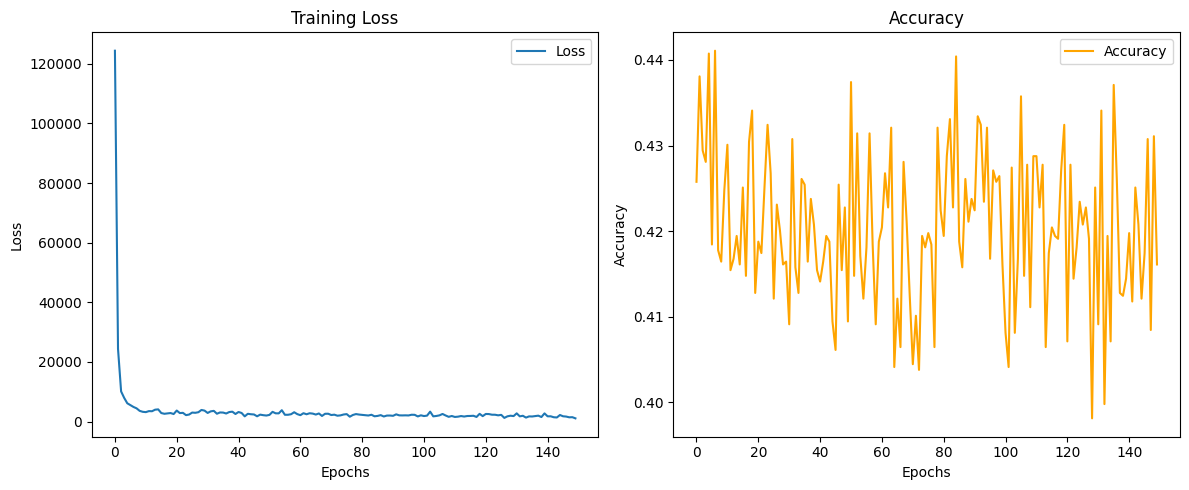

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

plt.show()


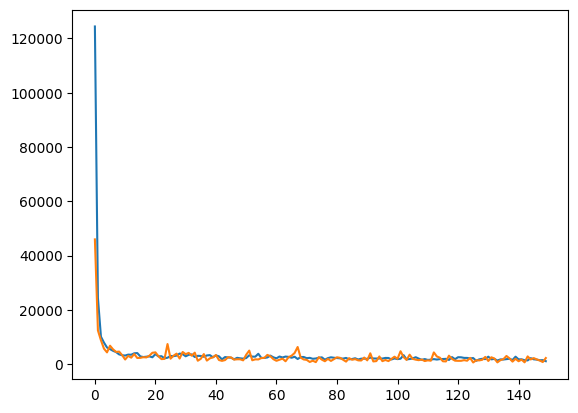

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Using the trained model to make predictions based on the input features of the data.
Y_pred = model1.predict(X_test,)

24/24 [==============================] - 0s 2ms/step


In [ ]:
Y_pred

array([[0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 1.7393614e-34, 9.9999994e-01],
       [0.0000000e+00, 1.2339459e-04, 9.9987674e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.9148238e-03, 9.9608517e-01]], dtype=float32)

In [ ]:
Y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
conf_matrix = confusion_matrix( np.argmax(Y_pred, axis = 1), np.argmax(Y_test, axis = 1))

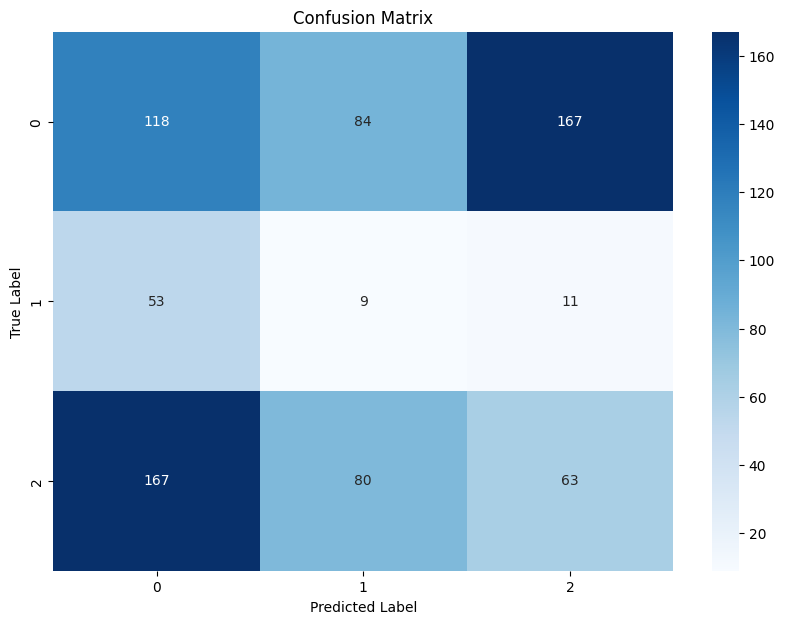

In [ ]:
# Visualization of the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

These confusion matrices show the performance of a classification model. In both cases, there are noticeable misclassifications, particularly between classes 1 and 3, and class 2 is consistently poorly predicted. While there's some capability to predict class 1 accurately, improvements are needed overall to better distinguish between all classes.

In [ ]:
Y_train_Pred = model1.predict(X_train)

94/94 [==============================] - 0s 3ms/step


In [ ]:
conf_matrix2 = confusion_matrix( np.argmax(Y_train_Pred, axis = 1), np.argmax(Y_train, axis = 1))

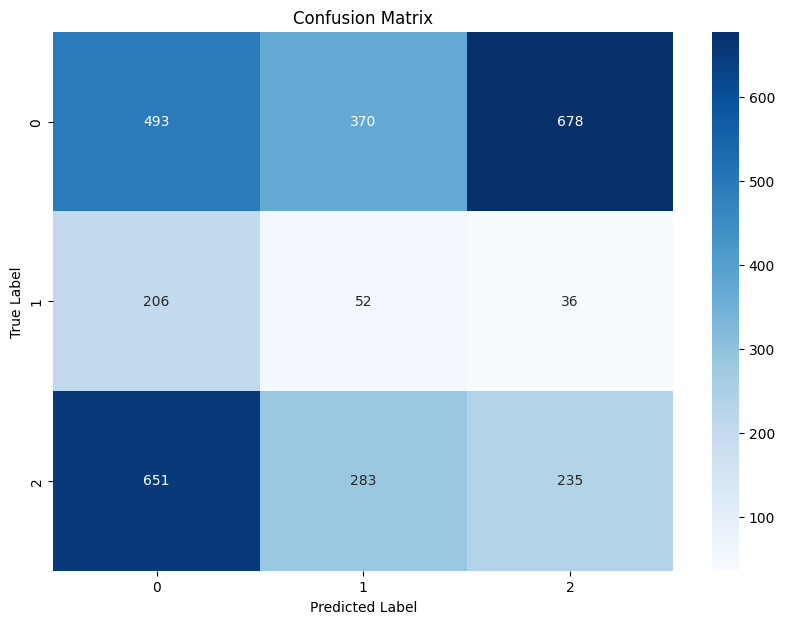

In [ ]:
# Visualization of the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Sometimes, during the training process, the loss may drop drastically, which can lead to a phenomenon where the model predicts the same values for every entry. This situation often occurs when the model encounters a steep gradient in the loss landscape, causing it to quickly adjust its parameters to minimize the loss. However, if this adjustment is too abrupt or if the model converges to a suboptimal solution, it may result in a scenario where the model assigns the same prediction to every input. Essentially, the model becomes "overconfident" in its predictions, as it believes that predicting the same value for all inputs minimizes the loss the most.

Another thing I noticed was the model's predictions can become overly simplistic, leading it to predict all wins, draws, or losses and other times it would just predict wins and losses and not predict any draws

##Iteration 2 Evaluation (Linear SVC)

In [ ]:
# Make predictions
Y_pred = clf.predict(X_test,)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_pred, Y_test)

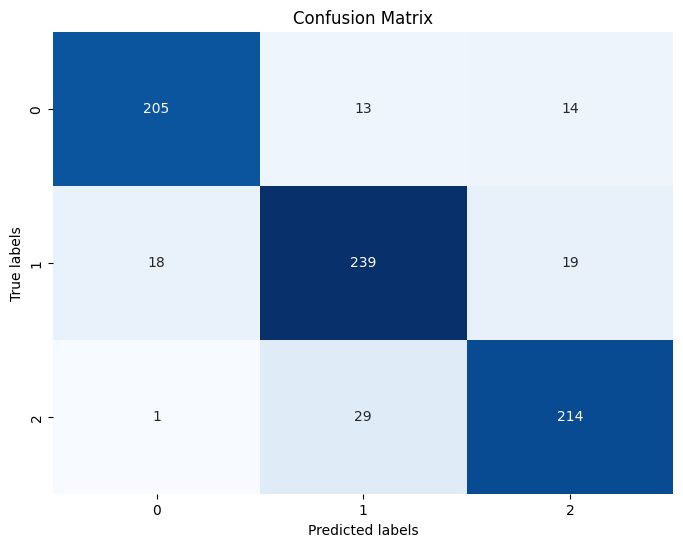

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       224
           1       0.87      0.85      0.86       281
           2       0.88      0.87      0.87       247

    accuracy                           0.88       752
   macro avg       0.88      0.88      0.88       752
weighted avg       0.87      0.88      0.87       752



The evaluation of the LinearSVC model yielded promising results across multiple metrics. Firstly, the accuracy of the model was found to be 87.5%, indicating that it correctly classified the majority of instances in the dataset. This high accuracy suggests that the model has learned meaningful patterns in the data and can effectively distinguish between the different classes. Secondly, the confusion matrix provides a detailed breakdown of the model's performance for each class. The matrix reveals that the model achieved high numbers of true positives across all classes, with relatively low numbers of false positives and false negatives. This balanced distribution indicates that the model's predictions are reliable and consistent across different classes. Finally, the classification report further reinforces the model's robust performance. The report displays precision, recall, and F1-score metrics for each class, along with support values indicating the number of instances in each class. These metrics collectively demonstrate the model's ability to achieve high precision, recall, and F1-score values across all classes, reflecting its strong predictive performance and generalization capability. Overall, the evaluation results affirm the effectiveness of the LinearSVC model in accurately classifying instances within the dataset.

##Iteration 3 Evaluation (KNeighbor)

In [ ]:
# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6436170212765957


Confusion Matrix:
 [[206  50  13]
 [ 80 134  20]
 [ 44  61 144]]


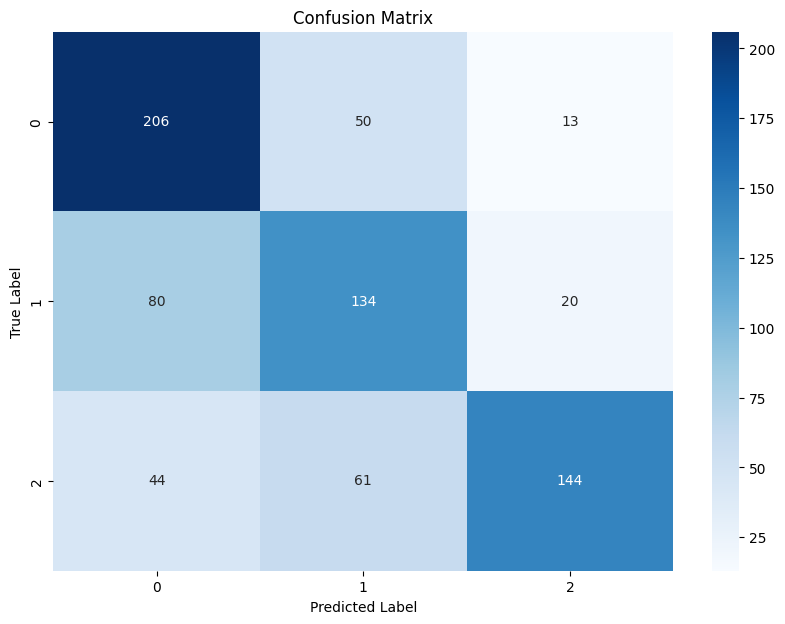

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69       269
           1       0.55      0.57      0.56       234
           2       0.81      0.58      0.68       249

    accuracy                           0.64       752
   macro avg       0.66      0.64      0.64       752
weighted avg       0.66      0.64      0.64       752



The KNeighbors estimator achieved an overall accuracy of approximately 64.36%. The confusion matrix indicates that the model struggled particularly with classifying instances belonging to class 1, with a relatively low precision of 0.55 and recall of 0.57. Class 2, on the other hand, showed higher precision (0.81) but lower recall (0.58). Class 0 had a relatively balanced precision and recall. The macro-average F1-score was 0.64, indicating the model's overall performance across all classes. The weighted average F1-score, which considers class imbalance, was also 0.64. These results suggest that while the model shows some capability in distinguishing between classes, there is room for improvement, particularly in enhancing its ability to correctly classify instances in class 1.

# **Stage 6**
***Present results and Conclusions***




##Summary of Results
In this analysis, we explored multiple machine learning models to address the possibility of predicting Premier League results based on historic data and Fifa player. Among the models tested, the Linear Support Vector Classification (Linear SVC) demonstrated superior performance, providing the best balance between accuracy, precision, recall and confusion matrix.

##Model Performance:
**Linear SVC:** Achieved an accuracy of 87.5%, with high (>85%)precision and recall values.

**Sequential Model (Deep Learning):** Accuracy of ~40%. This model proved problematic predicting data often predicting the same values for every sample or only predicting one of the classes.

**K-Nearest Neighbors (KNN) model:** showed a lower accuracy of 64.36%, with precision and recall values of 66% and 64%, respectively. Better than the sequential model but worse than the Linear SVC model.

##Key Findings:
Linear SVC effectively distinguished between the three outcome classes of Premier League matches: wins, losses, and draws. It particularly excelled in accurately predicting wins. The Sequential model very rarely predicted draws & as previously mentioned was very erratic, returning different results everytime the model was reset and run.

##Conclusions
The superior performance of the Linear SVC model can be attributed to its ability to handle high-dimensional data efficiently and its margin optimization, which are crucial for clear classification in complex datasets. This model's high accuracy and generalisation capabilities make it particularly effective for tasks involving multi-class predictions with imbalanced datasets. Based on our analysis, Linear SVC stands out as the most effective model for predicting Premier League results, making it highly recommended for deployment in predictive systems within sports analytics. This model is particularly suited for pre-match predictions in football leagues, where match odds are available.